In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

In [2]:
def image_process(image_name):
    img = cv2.imread(image_name)
    img_blur = cv2.GaussianBlur(img,(3,3),0)
    edge_output = cv2.Canny(img_blur, 90,180)
    ret,thresh_process = cv2.threshold(edge_output,200,255,cv2.THRESH_BINARY)
    image_shape_x = thresh_process.shape[0]
    image_shape_y = thresh_process.shape[1]
    return img,thresh_process,image_shape_x,image_shape_y

In [3]:
def find_edge_point(thresh_process):
    x, y = np.where(thresh_process>0)
    list_point = []
    for i in range(len(x)):
        point = [x[i], y[i]]
        list_point.append(point)
    return((list_point))

In [4]:
def find_circle(edge_point,r,r_min,image_shape_x,image_shape_y):
    map_vote = np.zeros([image_shape_x,image_shape_y,r])
    for k in tqdm(range(len(edge_point))):
        x_min = max(edge_point[k][0]-r,0)
        x_max = min(edge_point[k][0]+r,image_shape_x)
        y_min = max(edge_point[k][1]-r,0)
        y_max = min(edge_point[k][1]+r,image_shape_y)
        for i in range(x_min,x_max):
            for j in range(y_min,y_max):
                distance = math.sqrt((edge_point[k][0]-i)**2 + (edge_point[k][1]-j)**2)
                if (distance<r and distance>r_min):
                    map_vote[i][j][int(distance)] += 1/distance
    return map_vote

In [5]:
def plot_image(circle,img):
    #circles = np.round(np.around(circle))  # 四舍五入，取整
    for i in circle[:]:
        cv2.circle(img, (i[1], i[0]), i[2], (255, 0, 0), 1)  # 画圆
    plt.imshow(img,cmap = 'gray')
    cv2.imwrite('ans.jpg',img)

In [6]:
def process(image_name,r_max,r_min,num):
    img, thresh_process,image_shape_x,image_shape_y = image_process(image_name)
    edge_point = find_edge_point(thresh_process) 
    
    map_vote = find_circle(edge_point,r_max,r_min,image_shape_x,image_shape_y)
    x, y, r = np.where(map_vote>0)
    vote = []
    for i in range(len(x)):
        vote.append(map_vote[x[i]][y[i]][r[i]])
    temp=[]
    Inf = 0
    for i in tqdm(range(num)):
        temp.append(vote.index(max(vote)))
        vote[vote.index(max(vote))]=Inf
    circle = []
    for i in temp:
        circle.append([x[i],y[i],r[i]])
    plot_image(circle,img)
    

100%|██████████| 2/2 [00:00<00:00, 56.52it/s]


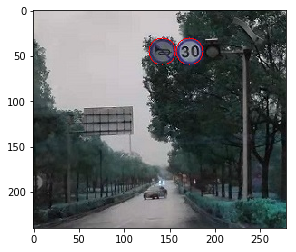

In [8]:
process('5.jpg',20,15,2)

100%|██████████| 1/1 [00:00<00:00, 52.11it/s]


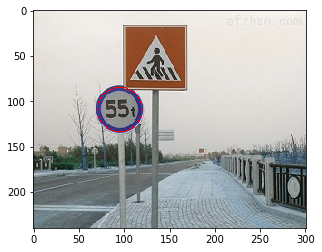

In [9]:
process('7.jpg',30,25,1)

100%|██████████| 2/2 [00:00<00:00, 25.58it/s]


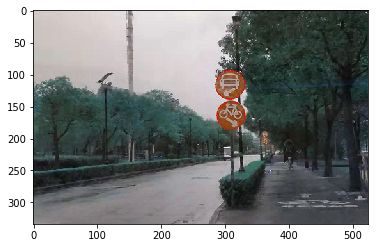

In [10]:
process('4.jpg',25,20,2)

100%|██████████| 1/1 [00:00<00:00, 36.62it/s]


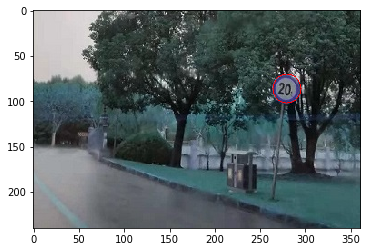

In [11]:
process('6.jpg',20,15,1)